In [6]:
import functions

months_list, df_list, df = functions.getData()

## Question RQ1 - 1

- Which is the rate of complete funnels?

We consider the whole dataset (which includes all the months we are observing) and create from it several groups, each one containing all the actions each user has ever performed in our shop (the possible actions are: "view", "cart", "purchase"). We then convert the result into a dictionary, where each key is represented by the user_id, and each value is the list of all its recorded actions. 

As a second step, we extract from the dictionary all the items that contains at least one "view", one "cart" and one "purchase" event, and store them in the "users_with_funnels" variable. **All checks are necessary, as there are items in the dataset where purchases have been made without previously recording "views" or "carts" events**.

With the third step we generate, out of the previous variable, another dictionary, containing the number of times each one of the three events occurs in the list. Since we know we are only dealing with elements that contains complete funnels, we simply take the minimum value out of each list, and that value is going to be the number of times each user has performed a complete funnel.

Eventually, we have a dictionary that stores the exact number of complete funnels made by each user. Users that haven't made at least a complete funnel are not included. As an example, we provide the first 15 elements of the Complete Funnels dataframe

Another thing we can do, is to see the rate of users that performed a complete funnel among all users.

In [2]:
events_per_user, complete_funnels, rate = functions.rateOfCompleteFunnels(df)

complete_funnels.head(15)

,User ID,Complete Funnels
0,225644257,1
1,256164170,1
2,296197073,1
3,299358698,1
4,304707635,1
5,307138432,1
6,308228668,1
7,310402868,1
8,315835135,1
9,315835876,1


In [3]:
print('Rate of users that have performed at least a complete funnel: ', rate)

Rate of users that have performed at least a complete funnel:  0.11


## Question RQ1 - 2

- What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation

We calculate the average number of times each event occurs in each user session. We then plot the result.

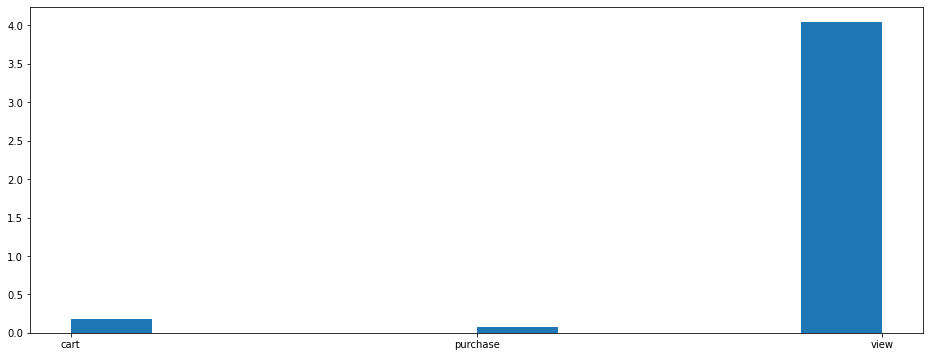

In [4]:
functions.mostFrequentOperationPerSession(df)

## Question RQ1 - 3

- How many times, on average, a user views a product before adding it to the cart?

We make use of the variable "events_per_user" defined in **RQ1 - 1** to generate a dictionary containing all the views in each user_session until a "cart" or "purchase" event is detected.
Then we calculate how many times per session the user views products around the shop, and eventually the average of all these values is printed.

In [5]:
average = functions.averageViewsBeforeCart(df, events_per_user)

print('The average number of times a user views a product during each session is: ', average)

The average number of times a user views a product during each session is:  10.61


## Question RQ1 - 4

- What’s the probability that products added once to the cart are effectively bought?

Again, we make use of the variable "events_per_user" defined in **RQ1 - 1**, this time to extract all the sessions where the user has put some products in the cart at least once (variable: "potentially_customers"), and all the users that have both added products to the cart and purchased them (variable: "customers").

The probability is given by the ratio: customers / potentially customers

Also in this case, calculations would be easier if we could assume that every item, before being purchased, has been viewed and inserted in the cart. Unfortunately, even though it is counterintuitive, this doesn't seems to be the case.

In [6]:
probability = functions.purchaseProbabilityAfterCart(df, events_per_user)

print('The probability is: ', probability)

The probability is:  0.54


## Question RQ1 - 5

- What’s the average time an item stays in the cart before being removed?

The approach is to first filter out from the dataset all the "view" events, which are not useful, then save in a dictionary, for every user session, a list containing all the events (in this case, only "cart" and "purchase"), along with the time they occurred.
The following three steps are:
1. Filter out all the non necessary user sessions, that are all the sessions that doesn't have both "cart" **AND** "purchase" events.
2. Extract from each session a sublist of events, that goes from "cart" to "purchase". This is necessary because sometimes items are purchased before being viewed, or inserted in the cart. As seen at this link https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store/discussion/132470, given that the event "remove from cart" is not available, we can consider the time passed from the event "cart" to the event "purchase", hence we only save the first event (cart) and the last event (purchase) of the sublist.
3. At this point, we simply have to calculate the difference between the date of purchase and the date the product was added to the cart, for each user session.

As a last step, we take all the time differences, that are in seconds, we calculate the average, and we return the result. 

In [7]:
averageTimeInCart = functions.averageTimeInCartBeforePurchase(df)

print('The average time an item stays in the cart before being removed is (rounded, in minutes): ', averageTimeInCart)

The average time an item stays in the cart before being removed is (rounded, in minutes):  3


## Question RQ1 - 6

- How much time passes on average between the first view time and a purchase/addition to cart?

We create two subsets, one containing all the "view" events, and the other containing the "cart" and the "purchase" events. Both are grouped by user session. In both subsets, for each user session, we only extract the first event, which is the first in time.
The very reasonable assumption we make, is that the "view" event should always happen before "cart" or "purchase".
Given such assumption, we merge the two subsets into one. This new dataset has, for each row, the first "cart" or "purchase" event as element of the column "event_type_y", and the first "view" event as element of the column "event_type_x", with their corresponding event times "event_time_x" and "event_time_y".

We extract only the "event_time_x" and "event_time_y" columns, and calculate the difference between them (as per our assumption, the dates in "event_time_y" are bigger then the dates in "event_time_x", hence the result is positive.
The difference is returned in minutes, and rounded without decimals.

In [8]:
averageTimeBeforeCartOrPurchase = functions.averageTimeBeforeCartOrPurchase(df)

print('The average time a user views a product before adding it to cart or purchasing it is (rounded, in minutes): ', averageTimeBeforeCartOrPurchase)

The average time a user views a product before adding it to cart or purchasing it is (rounded, in minutes):  6


## Question RQ2 - 1

- What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category

We iterate over all the datasets contained in df_list. Each element corresponds to a given month.
For each dataset, we filter only the rows reporting the sale of a product (the "purchase" event). Then, we group all elements by category, and count the event types (that are now only the purchases). Eventually, we plot each month's sales per product.

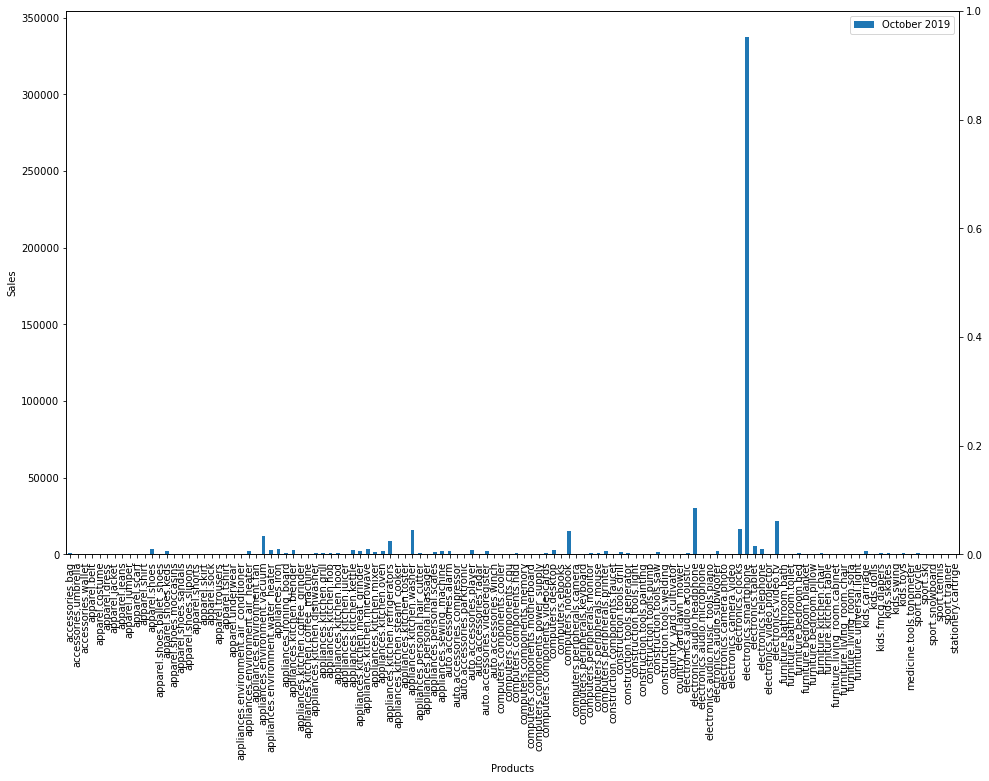

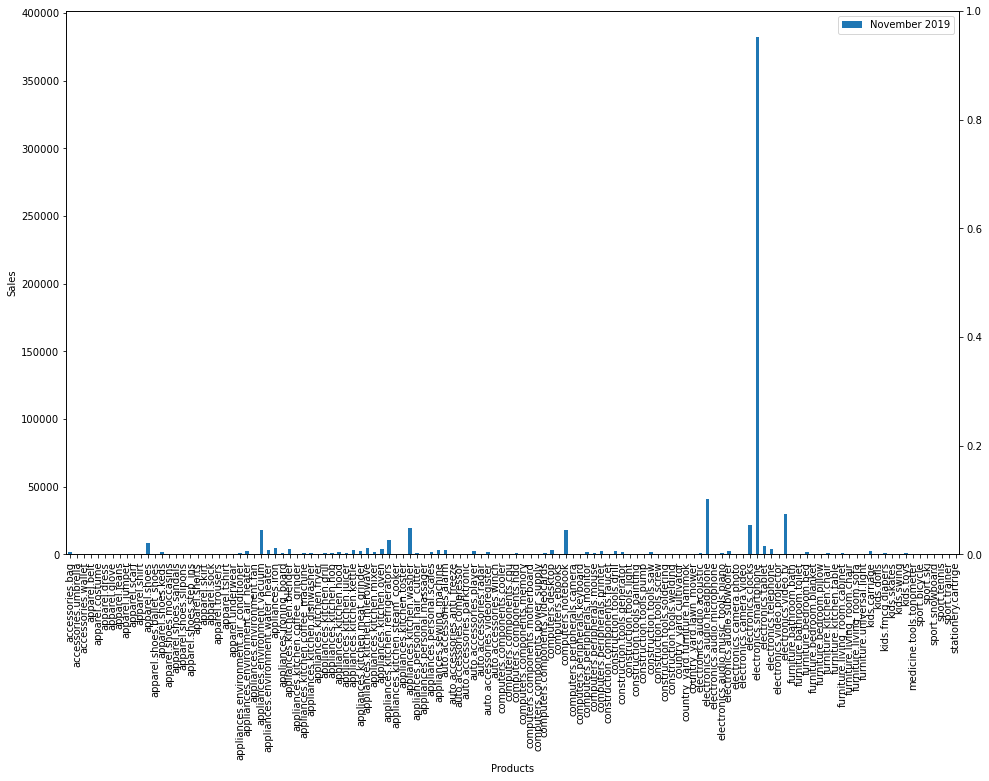

In [9]:
months = functions.getSoldProductsByCategoryPerMonth(df_list)

for i in range(len(months)):
    functions.plotSoldProductsByCategoryPerMonth(months[i], months_list[i])

## Question RQ2 - 2

- Plot the most visited subcategories

In this case, we refer to the entire dataset of all months. We filter the dataset to get only the events where the user has 'viewed' a product, we select the 'category_code' column and split it into subcategories. If children subcategories are found, we take the first child as our target, otherwise the parent is taken. We group the data based on our target category/subcategory by means of the "Counter" library. Eventually, we plot the result.

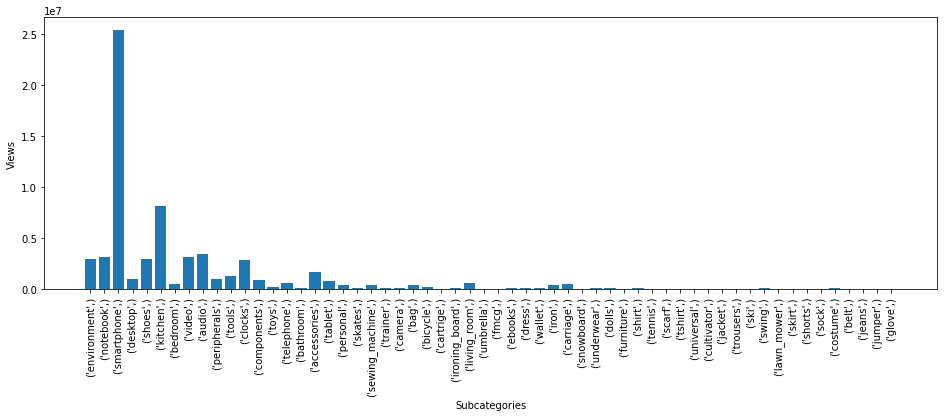

In [10]:
functions.plotMostVisitedSubcategories(df)

## Question RQ2 - 3

- What are the 10 most sold products per category?

From the dataset, we take the columns we need (event_type and category_code), we extract the events where the user has 'purchased' a product. Then, we sort the values by "sales" in descending order, and eventually print to screen the first 10 results.

In [11]:
functions.mostSoldProductsPerCategory(df)

,event_type
category_code,
electronics.smartphone,720067
electronics.audio.headphone,71181
electronics.video.tv,51726
electronics.clocks,38073
appliances.kitchen.washer,35739
computers.notebook,33870
appliances.environment.vacuum,30340
appliances.kitchen.refrigerators,19291
apparel.shoes,12166


## Question RQ3 - 1

- For each category, what’s the brand whose prices are higher on average? Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand

We extract from the dataset all the rows belonging to the category of interest (the one inserted by the user). Since we want to figure out the number of sales, we only keep the events that are labelled as "purchase". At this point, we create a group for each "brand" in the dataset, and calculate the mean of the price of all the sales for each brand. Eventually, by means of the plot method, we plot the result.

Please, insert a category: accessories.bag


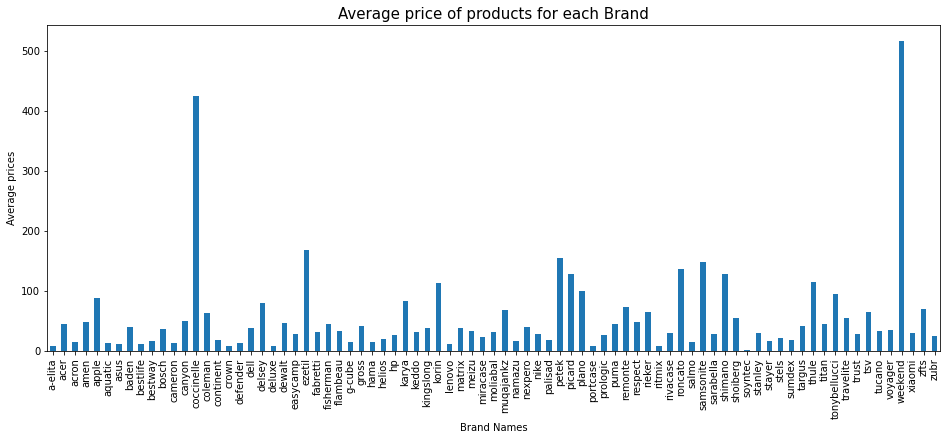

In [12]:
functions.averagePriceOfProductsByBrand(df)

## Question RQ3 - 2

- Find, for each category, the brand with the highest average price. Return all the results in ascending order by price

After grouping the dataset by category and brand, we calculate the mean for the price of each brand in each category.
We then group again all the categories and sort every group by its price value in descending order.
The column names at this point are changed to avoid confusion.
Eventually, the highest average prices are calculated by means of the max function over every grouped category.

In [13]:
functions.highestAveragePrices(df)

,brand,price
CategoryCode,,
construction.tools.soldering,zubr,19.709311
auto.accessories.anti_freeze,wurth,20.306417
apparel.shoes.espadrilles,spur,22.650000
apparel.scarf,fabretti,23.953310
accessories.umbrella,xiaomi,25.710000
...,...,...
appliances.kitchen.refrigerators,zanussi,2261.951167
sport.ski,volkl,2372.000000
sport.trainer,tianzhanfitness,2522.590000


## Question RQ6 - 1

- What's the conversion rate of your online store? Find the overall conversion rate of your store.

After grouping the dataset by product_id and event_type, we create two variables: the total number of purchases (n_purchase) and the total number of views (n_views).
We output the conversion rate of the store as the ratio between the total number of purchases and the total number of views.

In [14]:
conversion_rate = functions.findOverallConversionRate(df)

print('The conversion rate of the entire store is equal to: ', conversion_rate)

The conversion rate of the entire store is equal to:  0.019


## Question RQ6 - 2

- Plot the number of purchases of each category

Same question as RQ2 - 1, only this time we consider the whole dataset, which contains all months

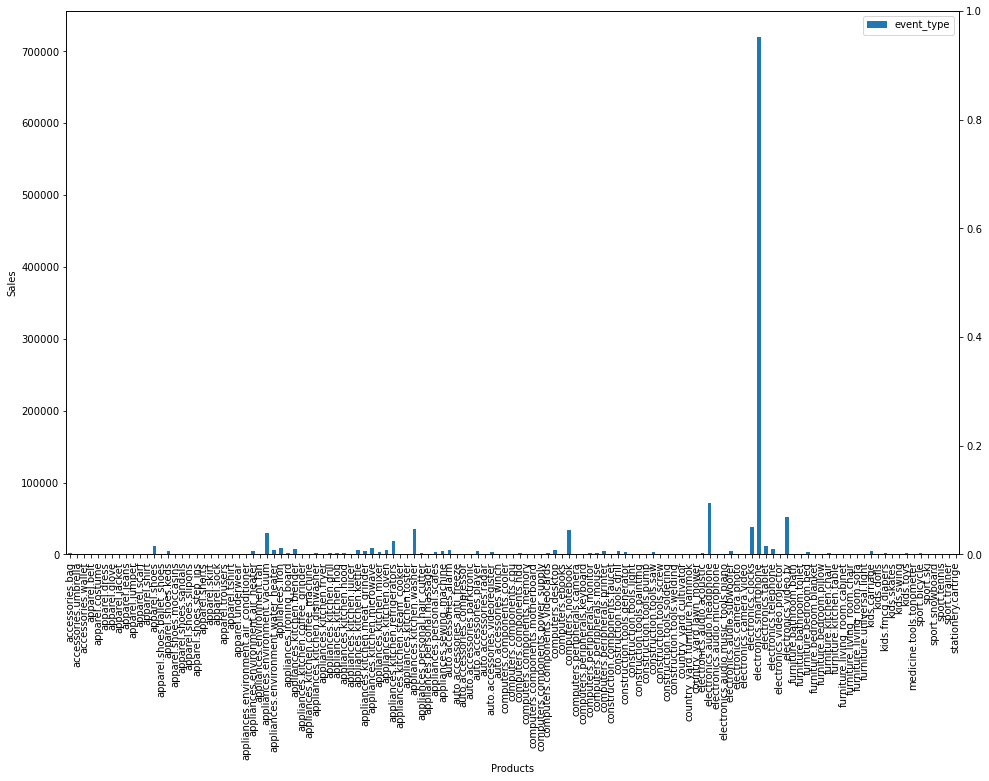

In [15]:
functions.plotSoldProductsByCategory(df)

## Question RQ6 - 3

- Show the conversion rate of each category in decreasing order

We first remove from the dataset the event_type "cart", which is not useful. After that, we groupby the columns "category_code" and "event_type", and then count the number of times each "event_type" is repeated per product. The result is stored in a dictionary "d". We iterate through "d" to generate the "products" and "conversion_rates" elements of the list "k", that are needed to plot the requested function. The intermediate dictionary "g" is created to help keeping track of the progress of the iterations over "d".
The dictionary "k" is sorted in descending order relatively to its values (the conversion rates), and its elements are associated to x (products) and y (conversion rates).
The variables "x" and "y" are finally used to plot the result.

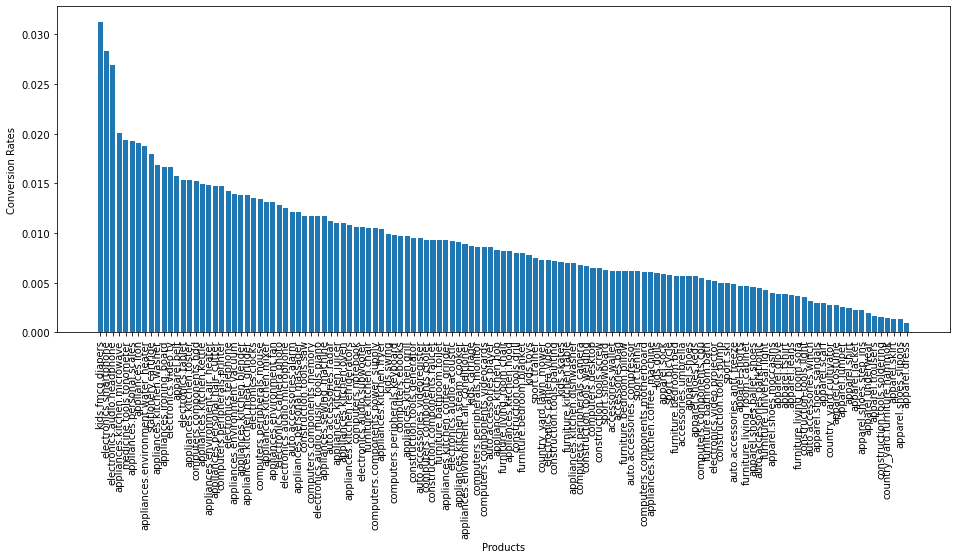

In [16]:
functions.findConversionRatePerCategory(df)

## Question RQ7 - 1

- Prove that the pareto principle applies to your store

First, we create a dataset named "customers" by filtering all the purchases made on our store. We then group the result into several groups, each one containing all the purchases made by each user. After that, we calculate the income made per user by means of the "price" column, and save the result in descending order. We now have a list of all the users according to how much they spent on our store.

With such information, it is now possible to create two different subsets: the first one containing the 20% of the customers that have spent the most (sales_20), and the second one with the remaining 80% (sales_80).

At this point, we can observe that 70% of the money we earned during the given observation period are only coming from 20% our customers. **The more we increase the size of out dataset, the more we can expect this ratio to tend to 80/20**, hence confirming the Pareto principle.

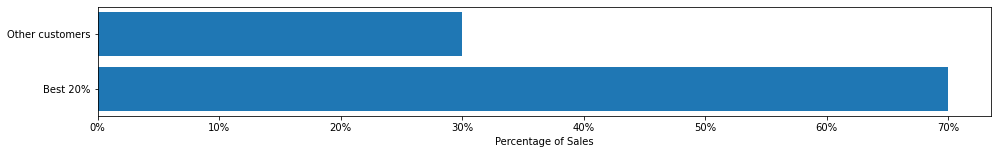

In [17]:
functions.proveParetoPrinciple(df)